# Regularización

### Daniel Marín López

---

In [ ]:
# Importamnos librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.metrics as Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

Creamos variables globales y funciones necesarias.

In [ ]:
SEED = 42
TEST = 0.2
FONT_SIZE = 14
FIG_SIZE = (8, 6)
CV = 5
MODELS_NAME = ["Regresión Lineal", "Ridge (L2)", "Lasso (L1)", "Elastic Net"]

def draw_data(x, y, title):
  plt.figure(figsize=FIG_SIZE)
  sns.scatterplot(x=x, y=y)
  plt.xlabel('$x$', fontsize=FONT_SIZE)
  plt.ylabel('$y$', rotation=0, fontsize=FONT_SIZE)
  plt.title(title)
  plt.show()

def draw_predictions(x, y, y_predict, title):
  plt.figure(figsize=FIG_SIZE)
  sns.scatterplot(x=x, y=y)
  plt.plot(x, y_predict, color='red')
  plt.xlabel('$x$', fontsize=FONT_SIZE)
  plt.ylabel('$y$', rotation=0, fontsize=FONT_SIZE)
  plt.title(title)
  plt.show()

def params_regularization(X, y, max_range = 2, max_iter = 10):
  param_grid_ridge = {'alpha': np.logspace(-3, max_range, max_iter)}
  param_grid_lasso = {'alpha': np.logspace(-3, max_range, max_iter)}
  param_grid_elastic = {'alpha': np.logspace(-3, max_range, max_iter), 'l1_ratio': np.linspace(0.1, 0.9, 5)}

  ridge_cv = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
  lasso_cv = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
  elastic_cv = GridSearchCV(ElasticNet(), param_grid_elastic, cv=5, scoring='neg_mean_squared_error')

  linear_model = LinearRegression()
  linear_model.fit(X, y)
  ridge_cv.fit(X, y)
  lasso_cv.fit(X, y)
  elastic_cv.fit(X, y)

  best_params = {
    "Ridge": ridge_cv.best_params_,
    "Lasso": lasso_cv.best_params_,
    "Elastic Net": elastic_cv.best_params_
  }

  print("Mejores hiperparámetros:")
  for model, params in best_params.items():
    print(f"{model}: {params}")

  best_models = {
    "Linear": linear_model,
    "Ridge": ridge_cv.best_estimator_,
    "Lasso": lasso_cv.best_estimator_,
    "Elastic Net": elastic_cv.best_estimator_
  }

  return best_models

def select_best_model(X_test, y_test, models: dict):
  y_predict_linear = models['Linear'].predict(X_test)
  y_predict_ridge = models['Ridge'].predict(X_test)
  y_predict_lasso = models['Lasso'].predict(X_test)
  y_predict_elastic = models['Elastic Net'].predict(X_test)

  mse_linear = mean_squared_error(y_test, y_predict_linear)
  mse_ridge = mean_squared_error(y_test, y_predict_ridge)
  mse_lasso = mean_squared_error(y_test, y_predict_lasso)
  mse_elastic = mean_squared_error(y_test, y_predict_elastic)

  r2_linear = r2_score(y_test, y_predict_linear)
  r2_ridge = r2_score(y_test, y_predict_ridge)
  r2_lasso = r2_score(y_test, y_predict_lasso)
  r2_elastic = r2_score(y_test, y_predict_elastic)

  best_mse = {
      'Linear': mse_linear,
      'Ridge': mse_ridge,
      'Lasso': mse_lasso,
      'Elastic Net': mse_elastic
  }

  print("Métricas de evaluación:")
  print("="*35)
  print(f"MSE Lineal: {mse_linear}")
  print(f"MSE Ridge: {mse_ridge}")
  print(f"MSE Lasso: {mse_lasso}")
  print(f"MSE Elastic Net: {mse_elastic}")
  print("="*35)
  print(f"R2 Lineal: {r2_linear}")
  print(f"R2 Ridge: {r2_ridge}")
  print(f"R2 Lasso: {r2_lasso}")
  print(f"R2 Elastic Net: {r2_elastic}")
  print("="*35)

  best_model = min(best_mse, key=best_mse.get)
  print(f"Mejor modelo: {best_model}")

  return models[best_model]

Aquí se han definido las siguientes funciones:

*   `params_regularization`: Esta función imprime los mejores hiperparámetros para las tres regularizaciones que hay. También entrena los modelos con los datos `X` e `y` con dichos hiperparámetros junto a la regresión lineal por defecto, además se puede cambiar el rango máximo (`max_range`) y el máximo de iteraciones (`max_iter`) por si el usuario deseara incrementar el rango o las iteraciones. Tras imprimir los mejores hiperparámetros se devuelve un diccionario con todos los modelos entrenados. Además que tenemos las siguientes consideraciones:
  * Usamos `scoring='neg_mean_squared_error'` ya que como debemos buscar el MSE más bajo al ponerlo en negativo este pasa a ser el más alto y eso es lo que `GridSearchCV` buscará por cada regularización.
  * Usamos `np.logspace` que crea una secuencia de números logarítmicamente espaciados dentro de un intervalo dado, esto es debido a que estos hiperparámetros tienen un impacto exponencial en el modelo y, por lo tanto, permite cubrir un rango más amplio de valores para encontrar aquel valor más óptimo de manera más sencilla.
  * Usamos `np.linspace` en `l1_ratio` que crea un conjunto de números espaciados de manera uniforme entre 0.1 y 0.9. Es mejor esta función ya que `l1_ratio` se mueve en un rango lineal y se puede especificar el número de puntos deseados en rango, facilitando la exploración.
*   `select_best_model`: Esta función se encarga de escoger al mejor modelo cuyo MSE sea el menor obtenido. Para ello se realizan predicciones con todos los modelos usando `X_test` y calculando tanto el MSE como el $R^2$ de los modelos usando `y_test` e `y_pred` e imprimiendolos por pantalla. Los MSE se guardan en un diccionario y de hay se obtiene el valor más pequeño, después de eso se imprime que modelo es el mejor para el problema y se devuelve.



---

### Ejercicio 1

Cargamos los datos y los visualizamos.

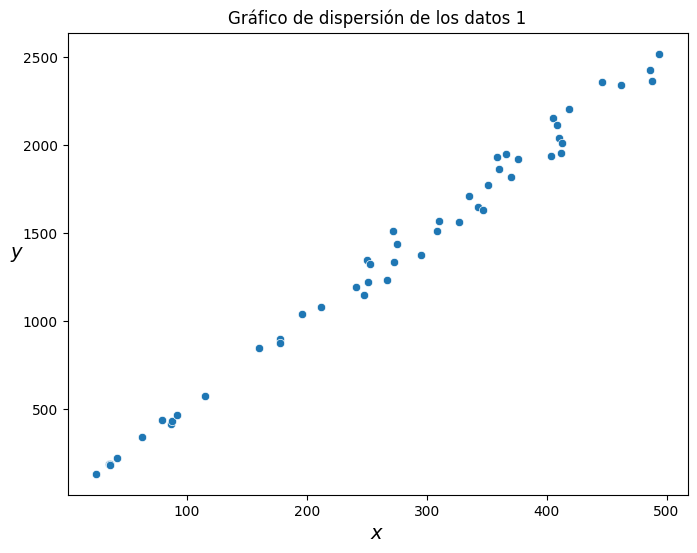

In [ ]:
data1 = pd.read_csv('rl1.csv')
draw_data(data1['x'], data1['y'], 'Gráfico de dispersión de los datos 1')

Realizaremos los mismos pasos que hicimos en el anterior ejercicio.

In [ ]:
X = data1[['x']]
y = data1[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST, random_state=SEED)

In [ ]:
std_scaler01 = StandardScaler()
X_train_scaled = std_scaler01.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = std_scaler01.transform(X_test.values.reshape(-1, 1))

Llamamos a `params_regularization` para obtener los mejores modelos con los datos y los guardamos el diccionario devuelto.

In [ ]:
best_models01 = params_regularization(X_train_scaled, y_train)

Mejores hiperparámetros:
Ridge: {'alpha': np.float64(0.01291549665014884)}
Lasso: {'alpha': np.float64(0.1668100537200059)}
Elastic Net: {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.7000000000000001)}


Una vez tenemos los modelos, buscamos aquel que tenga un mejor MSE con `select_best_model`.

In [ ]:
best_model01 = select_best_model(X_test_scaled, y_test, best_models01)

Métricas de evaluación:
MSE Lineal: 7318.063073904106
MSE Ridge: 7320.308656230358
MSE Lasso: 7319.675888737225
MSE Elastic Net: 7320.154083664549
R2 Lineal: 0.9697839942766634
R2 Ridge: 0.9697747223521477
R2 Lasso: 0.9697773350252008
R2 Elastic Net: 0.9697753605764273
Mejor modelo: Linear


Vemos que en este caso el mejor modelo es la regresión lineal por defecto. Cuyo MSE es de 7318.06.

In [ ]:
print("Coeficientes:", best_model01.coef_)
print("Intercepto:", best_model01.intercept_)
print(f"y = {best_model01.intercept_[0]:.2f} + {best_model01.coef_[0][0]:.2f}x")

Coeficientes: [[716.37720924]]
Intercepto: [1309.8]
y = 1309.80 + 716.38x


Visualizamos el modelo. Aplanamos los valores de los array unidimensionales y se los pasamos a la función para dibujar la gráfica.

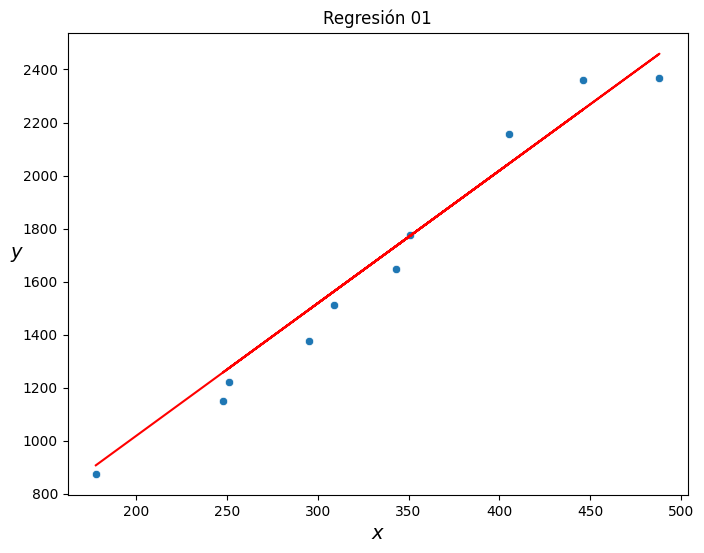

In [ ]:
y_predict = best_model01.predict(X_test_scaled)
X_draw01 = X_test.values.ravel()
y_draw01 = y_test.values.ravel()
draw_predictions(X_draw01, y_draw01, y_predict.ravel(), 'Regresión 01')

### Ejercicio 2

Cargamos los datos y los visualizamos.

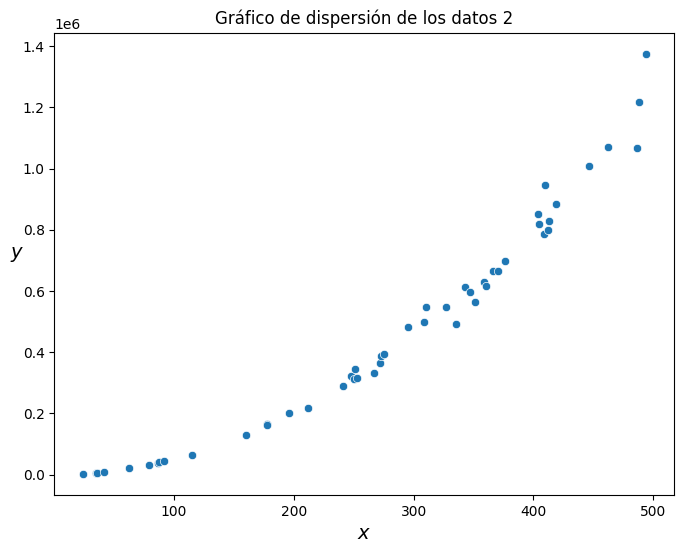

In [ ]:
data2 = pd.read_csv('rl2.csv')
draw_data(data2['x'], data2['y'], 'Gráfico de dispersión de los datos 2')

Como los datos presentan una curva, haremos la $X$ al cuadrado. Realizamos los mismos pasos que hicimos anteriormente.

In [ ]:
X = data2[['x']]
y = data2[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST, random_state=SEED)

Apilamos los datos por la izquierda, por lo que la primera columna es la que habrá que reordenar sus índices.

In [ ]:
X_train = np.column_stack((X_train**2, X_train))
X_test = np.column_stack((X_test**2, X_test))

sorted_index = np.argsort(X_test[:, 0])
X_test = X_test[sorted_index]
y_test = y_test.iloc[sorted_index]

In [ ]:
std_scaler02 = StandardScaler()
X_train_scaled = std_scaler02.fit_transform(X_train)
X_test_scaled = std_scaler02.transform(X_test)

Buscamos los mejores modelos para cada regularización.

In [ ]:
best_models02 = params_regularization(X_train_scaled, y_train)

Mejores hiperparámetros:
Ridge: {'alpha': np.float64(0.01291549665014884)}
Lasso: {'alpha': np.float64(100.0)}
Elastic Net: {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.1)}


Y buscamos aquel con la MSE más baja.

In [ ]:
best_model02 = select_best_model(X_test_scaled, y_test, best_models02)

Métricas de evaluación:
MSE Lineal: 825865610.0258671
MSE Ridge: 817669233.9214762
MSE Lasso: 811573027.5019685
MSE Elastic Net: 805021895.2419693
R2 Lineal: 0.9913367574686124
R2 Ridge: 0.9914227365833845
R2 Lasso: 0.991486685141228
R2 Elastic Net: 0.991555405822819
Mejor modelo: Elastic Net


Vemos que en este caso, Elastic Net es el que mejor desempeño ha dado.

In [ ]:
print("Coeficientes:", best_model02.coef_)
print("Intercepto:", best_model02.intercept_)
print(f"y = {best_model02.intercept_[0]:.2f} + {best_model02.coef_[0]:.2f}x^2 + {best_model02.coef_[1]:.2f}x")

Coeficientes: [365944.36446323  -7163.57113665]
Intercepto: [436510.15]
y = 436510.15 + 365944.36x^2 + -7163.57x


Visualizamos el modelo. Cómo los datos originales están en la última columna podemos poner `X_test[:,-1]` para indicar la última columna directamente.

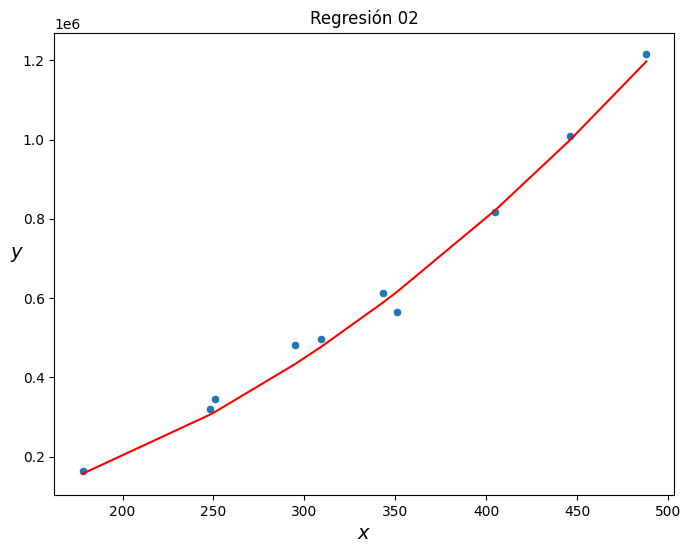

In [ ]:
y_predict = best_model02.predict(X_test_scaled)
X_draw02 = X_test[:,-1]
y_draw02 = y_test.values.ravel()
draw_predictions(X_draw02, y_draw02, y_predict.ravel(), 'Regresión 02')

### Ejercicio 3

Cargamos los datos y los visualizamos.

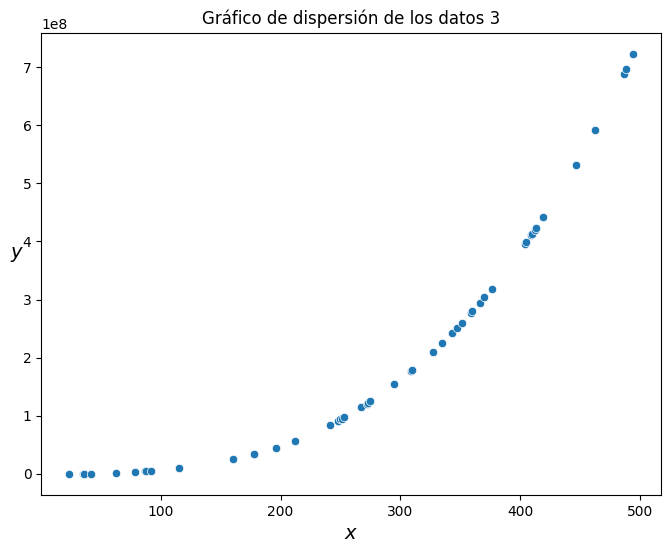

In [ ]:
data3 = pd.read_csv('rl3.csv')
draw_data(data3['x'], data3['y'], 'Gráfico de dispersión de los datos 3')

Probaré a dividir la $X$ al cubo ya que al cuadrado no encajaba la curva. Aquí usaremos `column_stack` para apilar tanto $X^2$ como $X^3$ en vez de usar `PolinomialFeatures`, además rebajaremos un grado el polinomio para ver si realmente con grado 3 es suficiente como hemos dicho anteriormente.

In [ ]:
X = data3[['x']]
y = data3[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST, random_state=SEED)

In [ ]:
X_train = np.column_stack((X_train**3, X_train**2, X_train))
X_test = np.column_stack((X_test**3, X_test**2, X_test))

sorted_index = np.argsort(X_test[:, 0])
X_test = X_test[sorted_index]
y_test = y_test.iloc[sorted_index]

In [ ]:
std_scaler03 = StandardScaler()
X_train_scaled = std_scaler03.fit_transform(X_train)
X_test_scaled = std_scaler03.transform(X_test)

Guardamos los mejores modelo.

In [ ]:
best_models03 = params_regularization(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.081e+14, tolerance: 1.195e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.021e+14, tolerance: 1.227e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.079e+14, tolerance: 1.407e

Mejores hiperparámetros:
Ridge: {'alpha': np.float64(0.001)}
Lasso: {'alpha': np.float64(0.001)}
Elastic Net: {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.9)}


Parece que ha habido problemas con algunos modelos, donde nos dice que para solucionarlo nos dice que revisemos el escalado, el nº de iteraciones o incrementar el rango de regularización. He probado distintos métodos pero no he podido controlar las advertencias, aun asi los modelos son devueltos sin problemas y podemos seguir trabajando con ellos. Por lo que ahora escogemos aquel con un MSE bajo.

In [ ]:
best_model03 = select_best_model(X_test_scaled, y_test, best_models03)

Métricas de evaluación:
MSE Lineal: 2.6645352591003756e-16
MSE Ridge: 5699406790.3237095
MSE Lasso: 1.163134129722465e-06
MSE Elastic Net: 68226328.02548619
R2 Lineal: 1.0
R2 Ridge: 0.9999998607004381
R2 Lasso: 1.0
R2 Elastic Net: 0.999999998332476
Mejor modelo: Linear


Vemos que el error es tan mínimo que incluso en el $R^2$ da un desempeño del 100% tanto la regresión lineal como Lasso. Pero el MSE de la regresión es más pequeño que el de Lasso.

In [ ]:
print("Coeficientes:", best_model03.coef_)
print("Intercepto:", best_model03.intercept_)
print(f"y = {best_model03.intercept_[0]:.2f} + {best_model03.coef_[0][0]:.2f}x^3 + {best_model03.coef_[0][1]:.2f}x^2 + {best_model03.coef_[0][2]:.2f}x")

Coeficientes: [[ 1.99489487e+08 -1.16038150e-07  2.84567949e-08]]
Intercepto: [1.94788294e+08]
y = 194788293.55 + 199489487.47x^3 + -0.00x^2 + 0.00x


Visualizamos los datos.

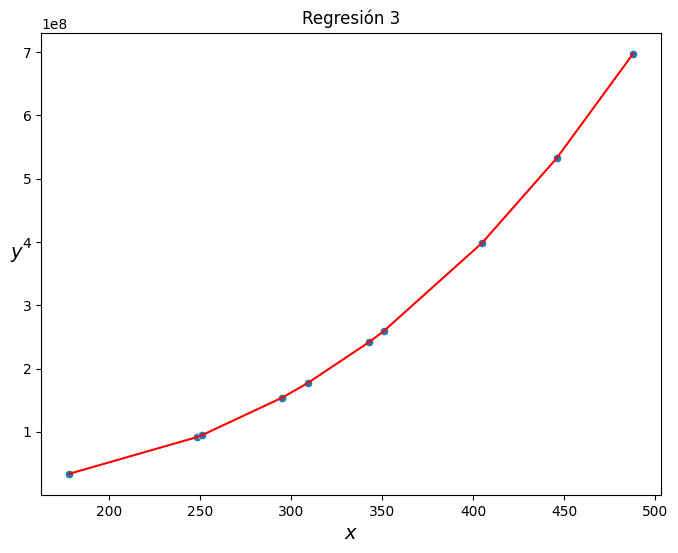

In [ ]:
y_predict = best_model03.predict(X_test_scaled)
X_draw03 = X_test[:,-1]
y_draw03 = y_test.values.ravel()
draw_predictions(X_draw03, y_draw03, y_predict.ravel(), 'Regresión 3')